In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from keckcode_test.keckcode.esiredux import esi2d, esi1d
from specim_test.specim.specfuncs import spec2d, echelle1d, echelle2d
from specim.specfuncs import spec1d

In [2]:
sp_file = 'J0659_LRIS_spectra/J0659_coadd2d_sp.fits'
var_file = 'J0659_LRIS_spectra/J0659_coadd2d_var.fits'

In [3]:
spec = spec2d.Spec2d(inspec=sp_file, invar=var_file)


Loading file J0659_LRIS_spectra/J0659_coadd2d_sp.fits
-----------------------------------------------

Loading file J0659_LRIS_spectra/J0659_coadd2d_var.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J0659_LRIS_spectra/J0659_coadd2d_sp.fits (HDU=0)
Final data dimensions (x y): 4096 x 61

Dispersion axis:              x
N_pixels along dispersion axis: 4096



Profile max value (before normalization) 342.021928


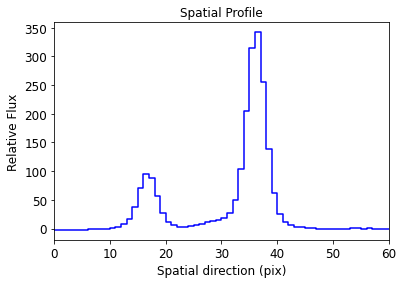


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : -2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 335, 37, 3, 4

amplitude=335.000000, x_0=37.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 15, 29, 2, 3

amplitude=15.000000, x_0=29.000000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 95, 17, 3, 4

amplitude=95.000000, x_0=17.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-2.97004096)>

    [1]: <Moffat1D(amplitude=343.

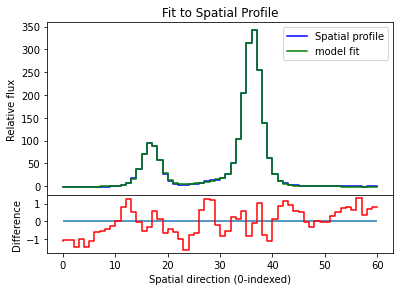

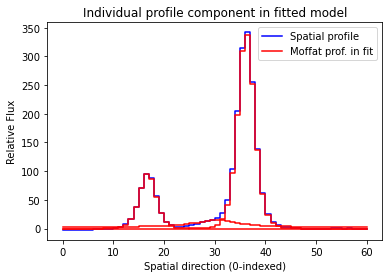


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=-2.97004096, amplitude_1=343.02455097, x_0_1=36.72356555, gamma_1=4.79028195, alpha_1=4.52362883, amplitude_2=15.68503136, x_0_2=30.67508646, gamma_2=2.95863536, alpha_2=0.45466825, amplitude_3=95.79735122, x_0_3=17.27371627, gamma_3=5.32806102, alpha_3=5.53464266)>

In [4]:
spec.spatial_profile(pixrange=[2500, 3000])
plt.show()
spec.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-2.97004096)>

    [1]: <Moffat1D(amplitude=343.02455097, x_0=36.72356555, gamma=4.79028195, alpha=4.52362883)>

    [2]: <Moffat1D(amplitude=15.68503136, x_0=30.67508646, gamma=2.95863536, alpha=0.45466825)>

    [3]: <Moffat1D(amplitude=95.79735122, x_0=17.27371627, gamma=5.32806102, alpha=5.53464266)>
Parameters:
           c0_0           amplitude_1    ...      gamma_3           alpha_3     
    ------------------ ----------------- ... ----------------- -----------------
    -2.970040960425271 343.0245509705155 ... 5.328061022998496 5.534642663884833

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.67079733)>

    [1]: <Moffat1D(amplitude=

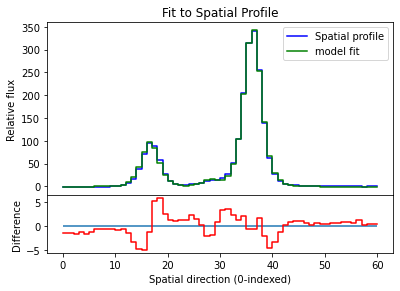

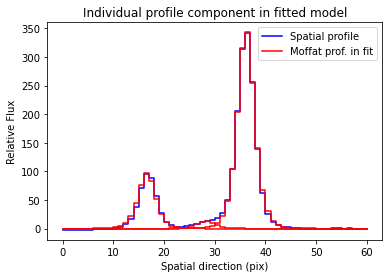

In [5]:
def tie_pos1_moffat(model):
    return model.x_0_1 - (2.16 / 0.270)

def tie_pos2_moffat(model):
    return model.x_0_1 - (5.29 / 0.270) 

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

spec.mod0[2].x_0.tied = tie_pos1_moffat
spec.mod0[3].x_0.tied = tie_pos2_moffat
spec.mod0[2].gamma.tied = tie_gamma_moffat
spec.mod0[2].alpha.tied = tie_alpha_moffat
spec.mod0[3].gamma.tied = tie_gamma_moffat
spec.mod0[3].alpha.tied = tie_alpha_moffat
spec.refined_model(spec.mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


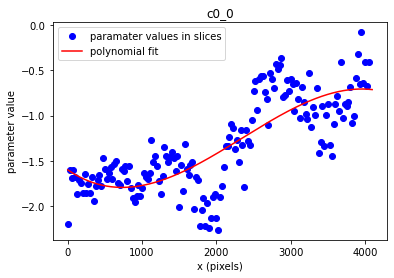

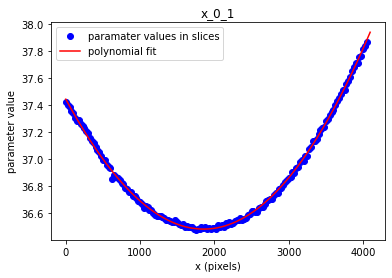

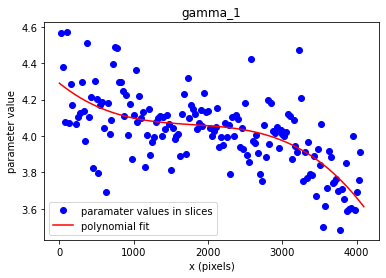

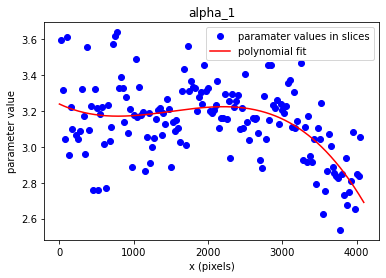

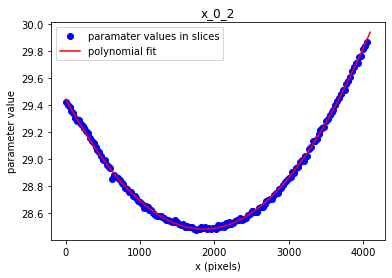

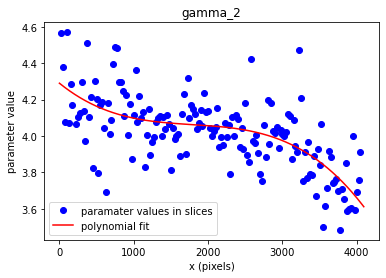

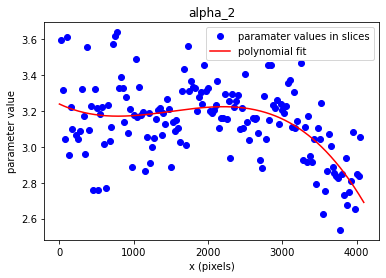

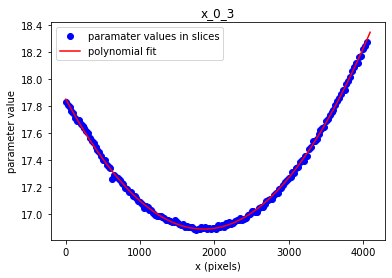

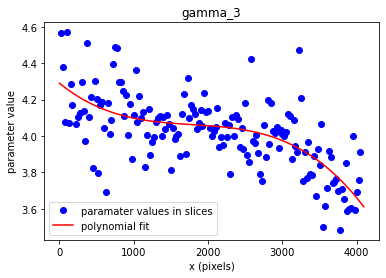

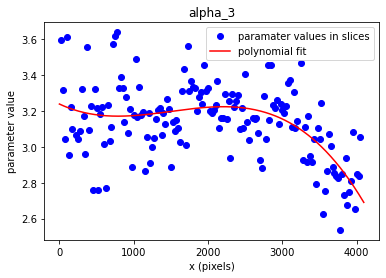

In [6]:
spec.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'mean_1':4, 'x_0_2':4, 'x_0_3':4},
                    fitrange=[0, 4100], polyorder=3)
plt.show()

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5581.60
 Spectrum End:     7219.60
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40

 Spectrum Start:  5581.60
 Spectrum End:     7219.60
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40

 Spectrum Start:  5581.60
 Spectrum End:     7219.60
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40


Plotting the spectrum


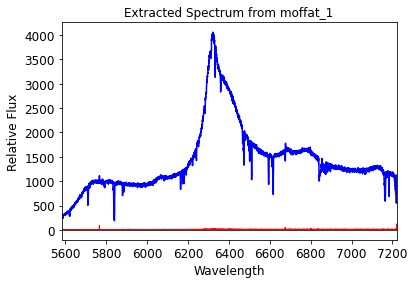

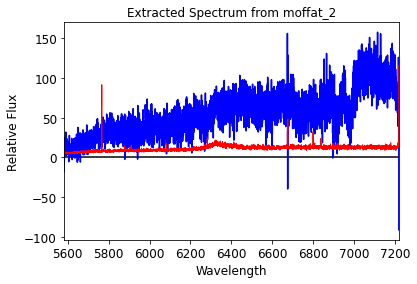

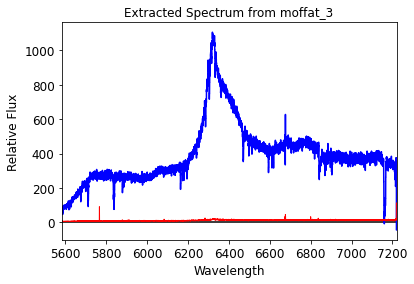

In [7]:
spec.extract(method='modelfit')
plt.show()

In [8]:
resp_sp = spec1d.Spec1d('J0659_LRIS_spectra/response_curve_from_G191_lris_coadd2d.txt')


Reading spectrum from J0659_LRIS_spectra/response_curve_from_G191_lris_coadd2d.txt
Expected file format: text
 Spectrum Start:  5581.60
 Spectrum End:     7219.60
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40



In [9]:
resp_sp.resample(owave=spec.spectra[1][1]['wav'])

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


In [10]:
spec.spectra[0][1].resp_corr(resp_sp.rsflux*10**-3, action='divide')
spec.spectra[1][1].resp_corr(resp_sp.rsflux*10**-3, action='divide')
spec.spectra[2][1].resp_corr(resp_sp.rsflux*10**-3, action='divide')

In [11]:
spec.spectra[0][1].save('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_primary.fits',
                        outformat='fits')
spec.spectra[1][1].save('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector.fits', outformat='fits')
spec.spectra[2][1].save('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_secondary.fits',
                        outformat='fits')

Saved spectrum to file J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_primary.fits in format fits
Saved spectrum to file J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector.fits in format fits
Saved spectrum to file J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_secondary.fits in format fits


In [12]:
sp_d = spec1d.Spec1d('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector.fits', informat='fits',
                     trimsec=[2131, 4091])#[1200, 4100])


Reading spectrum from J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  6434.00
 Spectrum End:     7217.60
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6592.50
[Fe VII]      3761.40       6612.54
H-iota        3770.00       6627.66
H-theta       3797.00       6675.13
H-eta         3835.00       6741.93
CN bandhd     3883.00       6826.31
CaII K        3933.67       6915.39
CaII H        3968.47       6976.57
H-delta       4101.00       7209.56



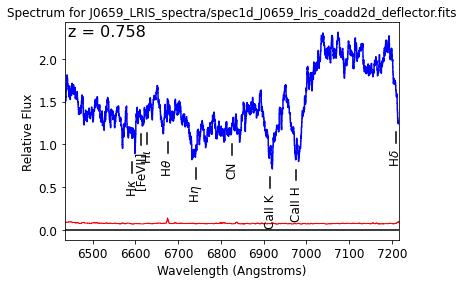

In [13]:
## after applying response correction
#%matplotlib notebook
#fg = plt.figure(figsize=(12, 5))
sp_d.smooth(11)#, fig=fg)
sp_d.mark_lines('abs', z=0.758, usesmooth=True, markatm=False)
#plt.savefig('J0659_deflector_spectrum.pdf', dpi=200)


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6592.50
[Fe VII]      3761.40       6612.54
H-iota        3770.00       6627.66
H-theta       3797.00       6675.13
H-eta         3835.00       6741.93
CN bandhd     3883.00       6826.31
CaII K        3933.67       6915.39
CaII H        3968.47       6976.57
H-delta       4101.00       7209.56



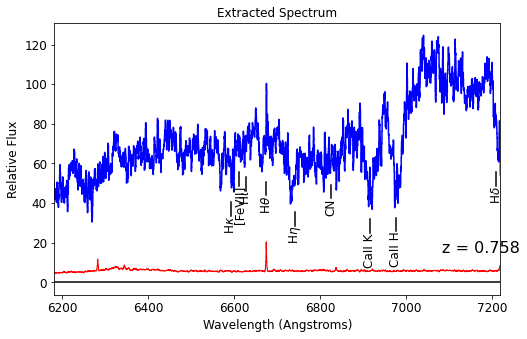

In [27]:
## before response correction
fg = plt.figure(figsize=(8, 5))
sp_d.smooth(7, fig=fg)
sp_d.mark_lines('abs', z=0.758, usesmooth=True, markatm=False)

In [14]:
sp_q = spec1d.Spec1d('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_primary.fits', informat='fits')


Reading spectrum from J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_primary.fits
Expected file format: fits
 Spectrum Start:  5581.60
 Spectrum End:     7219.60
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Si IV/O IV    1400.00       5716.20
N IV]         1486.50       6069.38
C IV          1549.10       6324.98



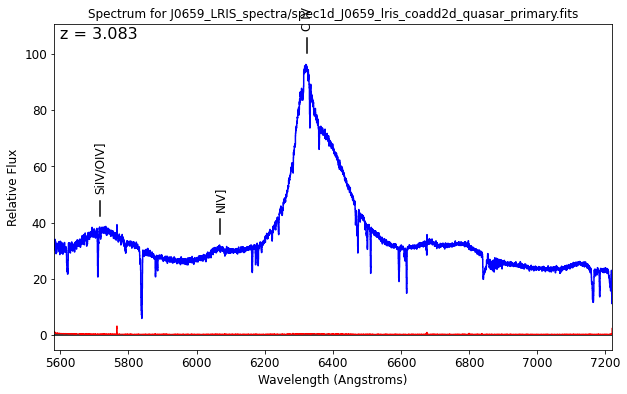

In [15]:
fg = plt.figure(figsize=(10, 6))
sp_q.smooth(1, fig=fg)
sp_q.mark_lines('strongem', z=3.083, usesmooth=True, markatm=False)
#plt.savefig('J0659_quasar_primary.pdf', dpi=200)

In [16]:
sp_q2 = spec1d.Spec1d('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_secondary.fits',
                      informat='fits')


Reading spectrum from J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_secondary.fits
Expected file format: fits
 Spectrum Start:  5581.60
 Spectrum End:     7219.60
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Si IV/O IV    1400.00       5716.20
N IV]         1486.50       6069.38
C IV          1549.10       6324.98



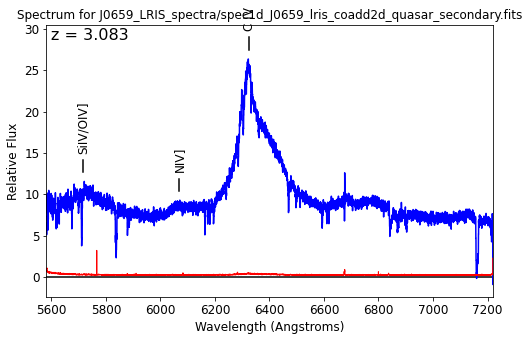

In [17]:
fg = plt.figure(figsize=(8, 5))
sp_q2.smooth(1, fig=fg)
sp_q2.mark_lines('strongem', z=3.0830, usesmooth=True, markatm=False)
#plt.savefig('J0659_quasar_secondary.pdf', dpi=200)

## Create 1d sky spetra from 2d varianc spectra using different frames

In [198]:
file = '../galaxy_spectra/LRIS_data/J0659/fpr190303_0047r.fits'

In [199]:
sp = spec2d.Spec2d(file)


Loading file ../galaxy_spectra/LRIS_data/J0659/fpr190303_0047r.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/J0659/fpr190303_0047r.fits (HDU=0)
Final data dimensions (x y): 4096 x 270

Dispersion axis:              x
N_pixels along dispersion axis: 4096

Found 12288 NaNs in the two-dimensional spectrum
after fixing number of NaNs is 12288


In [200]:
sp.get_wavelength()

In [201]:
wav_data = sp.wavelength # This is the 'Lpipe' derived solution 
wav_data

array([5581.60087891, 5582.00087891, 5582.40087891, ..., 7218.80087891,
       7219.20087891, 7219.60087891])

In [202]:
sky1d = np.nanmedian(sp.data, axis=0)

In [203]:
sp.data.shape, sky1d.shape

((270, 4096), (4096,))

In [204]:
sky_1d = spec1d.Spec1d(wav=wavelength, flux=np.ones(len(wav_data)), var=sky1d,
                      sky=sky1d) # Here adjusted wavelength solution has been used

 Spectrum Start:  5587.92
 Spectrum End:     7250.49
 Dispersion (1st pixel):   0.41
 Dispersion (average):      0.41



<IPython.core.display.Javascript object>


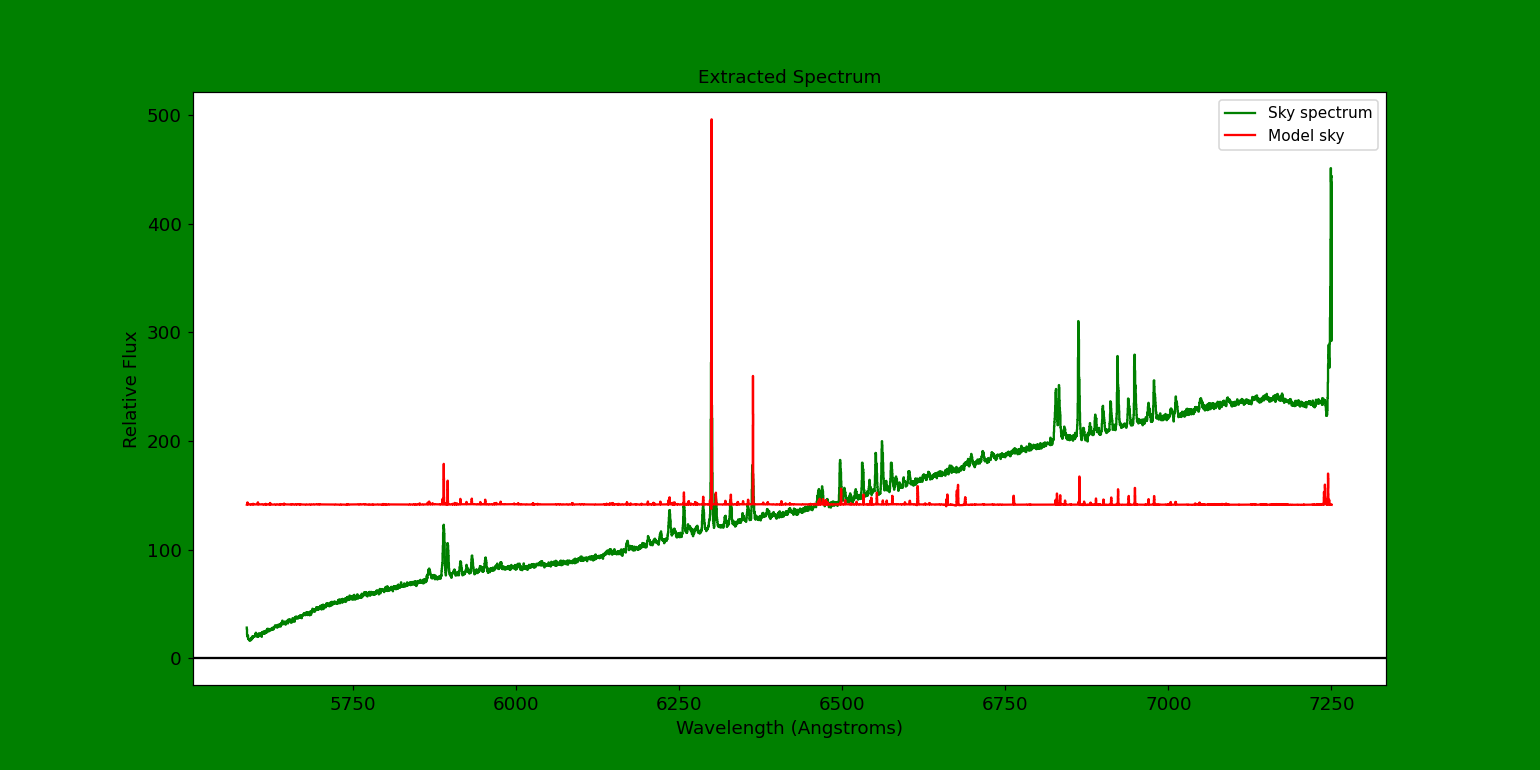


Smoothing sky spectrum with default value of  1.035 Ang

/home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 5587.918000
Model ending wavelength:    7250.488000
Model dispersion:             0.406000
 Spectrum Start:  5587.92
 Spectrum End:     7250.32
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

477.9076921463013 42.850845573963454
141.90002 0.14867745530988735


In [205]:
plt.figure(figsize=(14, 7), facecolor='g')
sky_1d.check_wavecal()


Smoothing sky spectrum with default value of  1.035 Ang

/home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 5587.918000
Model ending wavelength:    7250.488000
Model dispersion:             0.406000
 Spectrum Start:  5587.92
 Spectrum End:     7250.32
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

1097.3104384422304 42.850845573963454
120.86254 0.14867745530988735


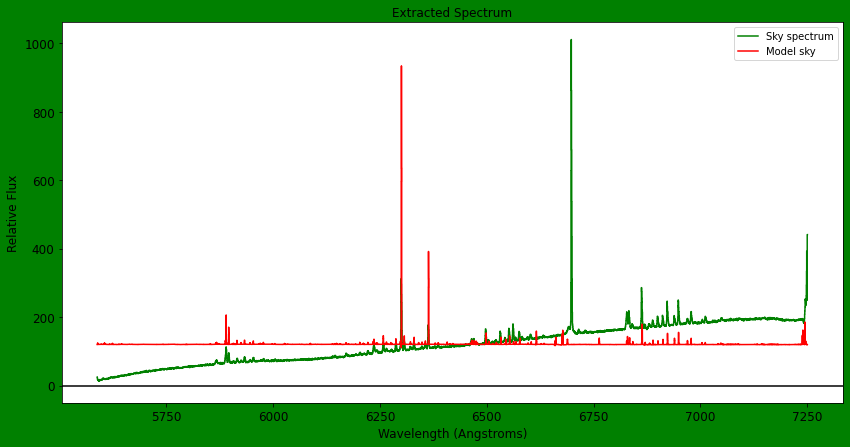

In [192]:
plt.figure(figsize=(14, 7), facecolor='g')
sky_1d.check_wavecal()


Smoothing sky spectrum with default value of  1.035 Ang

/home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 5587.918000
Model ending wavelength:    7250.488000
Model dispersion:             0.406000
 Spectrum Start:  5587.92
 Spectrum End:     7250.32
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

1212.3317974090578 42.850845573963454
105.039894 0.14867745530988735


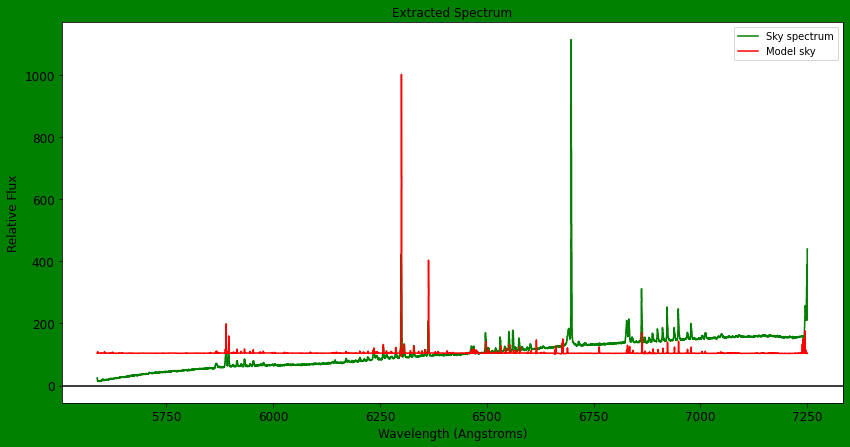

In [185]:
plt.figure(figsize=(14, 7), facecolor='g')
sky_1d.check_wavecal()


Smoothing sky spectrum with default value of  1.035 Ang

/home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 5587.918000
Model ending wavelength:    7250.488000
Model dispersion:             0.406000
 Spectrum Start:  5587.92
 Spectrum End:     7250.32
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

2354.6132991790773 42.850845573963454
113.195854 0.14867745530988735


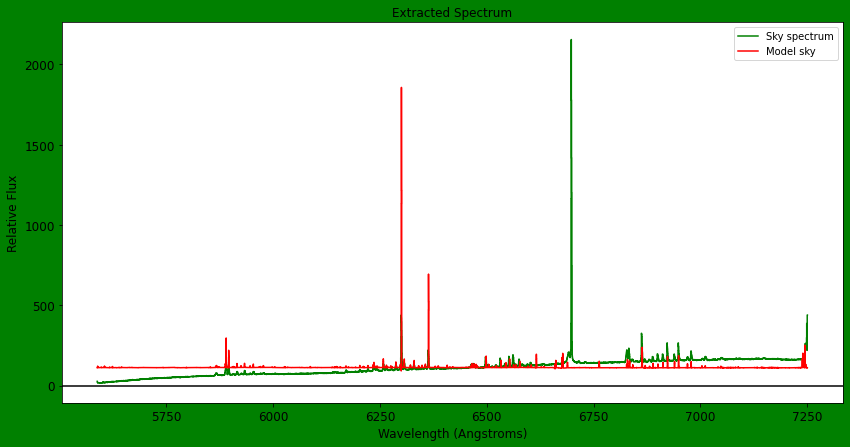

In [178]:
plt.figure(figsize=(14, 7), facecolor='g')
sky_1d.check_wavecal()


Smoothing sky spectrum with default value of  1.035 Ang

/home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 5587.918000
Model ending wavelength:    7250.488000
Model dispersion:             0.406000
 Spectrum Start:  5587.92
 Spectrum End:     7250.32
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

1234.906639766693 42.850845573963454
147.5761 0.14867745530988735


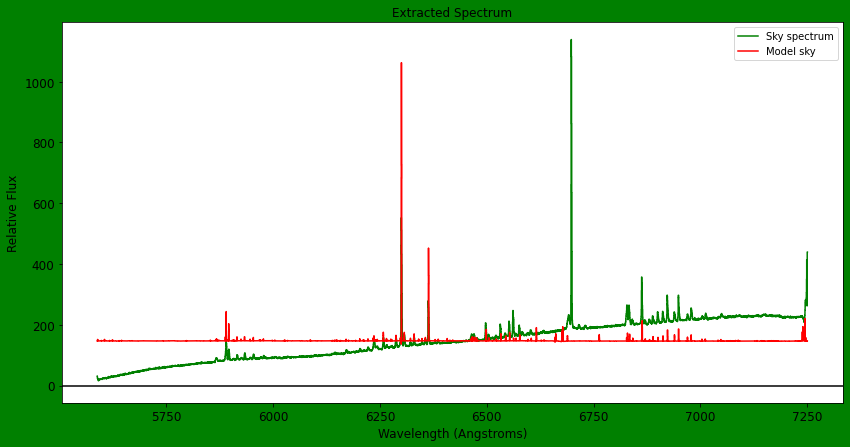

In [171]:
plt.figure(figsize=(14, 7), facecolor='g')
sky_1d.check_wavecal()


Smoothing sky spectrum with default value of  1.035 Ang

/home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.8/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 5587.918000
Model ending wavelength:    7250.488000
Model dispersion:             0.406000
 Spectrum Start:  5587.92
 Spectrum End:     7250.32
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

962.0811491012573 42.850845573963454
214.02379 0.14867745530988735


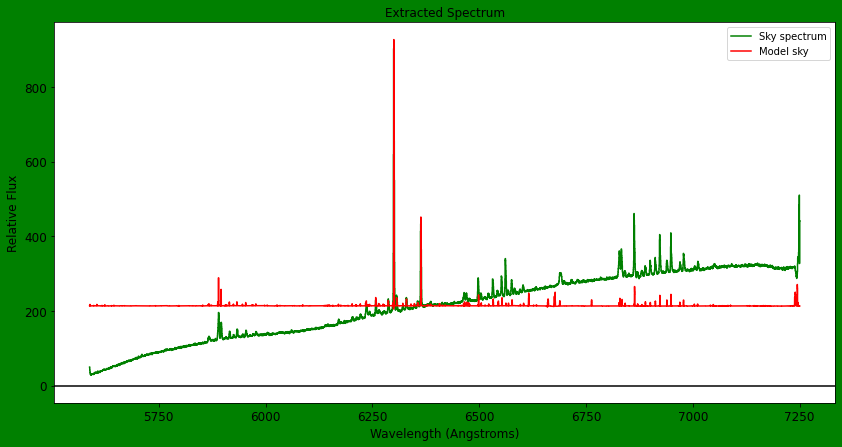

In [164]:
#%matplotlib notebook
plt.figure(figsize=(14, 7), facecolor='g')
sky_1d.check_wavecal()
#plt.savefig('sky_spec.pdf')

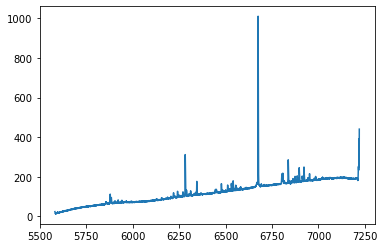

In [53]:
plt.plot(wav_data, sky1d)

In [82]:
-6915.39 + 3933.67*(1.766)       

31.471219999999448

In [23]:
3968.47*(1.766)-6976.57

31.748019999999997

In [24]:
3968.47*(1.766)

7008.31802

### The following is the manually adjusted wavelength solution for J0659 system. This wavelength solution matches pretty well with the sky models derived from six different frames. The plots are above.

In [18]:
dw = 0.406 #hdr[cdkey]
wstart = 6419.0 #.40087891 #hdr[crval]
wpix = 2048-1  #hdr[crpix]  - 1

""" Create the wavelength vector from the information above """
wavelength = wstart + (np.arange(4096) - wpix) * dw

In [19]:
fl = spec1d.Spec1d('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector.fits', informat='fits')


Reading spectrum from J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  5581.60
 Spectrum End:     7219.60
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40



In [20]:
spec_1d = spec1d.Spec1d(wav=wavelength, flux=fl['flux'], var=fl['var'])

 Spectrum Start:  5587.92
 Spectrum End:     7250.49
 Dispersion (1st pixel):   0.41
 Dispersion (average):      0.41



<IPython.core.display.Javascript object>


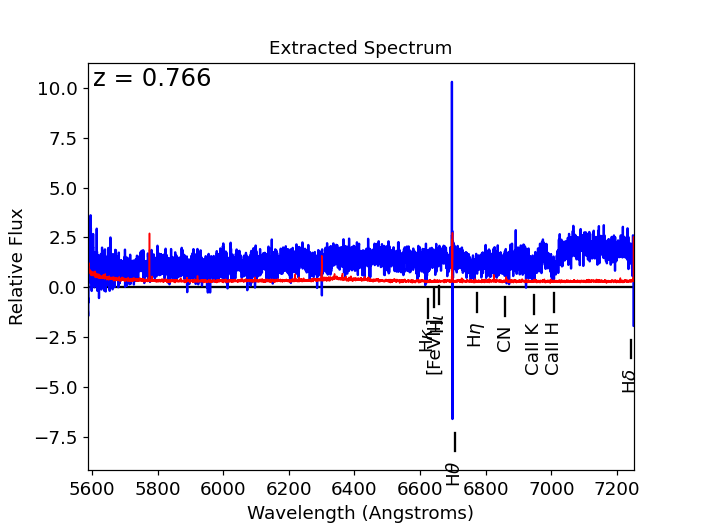


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6622.50
[Fe VII]      3761.40       6642.63
H-iota        3770.00       6657.82
H-theta       3797.00       6705.50
H-eta         3835.00       6772.61
CN bandhd     3883.00       6857.38
CaII K        3933.67       6946.86
CaII H        3968.47       7008.32
H-delta       4101.00       7242.37



In [229]:
%matplotlib notebook
spec_1d.smooth(1)
spec_1d.mark_lines('abs', z=0.766, usesmooth=True)

In [228]:
spec_1d.save('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector_new_wav.fits', outformat='fits')

Saved spectrum to file J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector_new_wav.fits in format fits


In [211]:
fl1 = spec1d.Spec1d('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_primary.fits', informat='fits')
                    


Reading spectrum from J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_quasar_primary.fits
Expected file format: fits
 Spectrum Start:  5581.60
 Spectrum End:     7219.60
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40



In [212]:
qs_p = spec1d.Spec1d(wav=wavelength, flux=fl1['flux'], var=fl1['var'])

 Spectrum Start:  5587.92
 Spectrum End:     7250.49
 Dispersion (1st pixel):   0.41
 Dispersion (average):      0.41



<IPython.core.display.Javascript object>


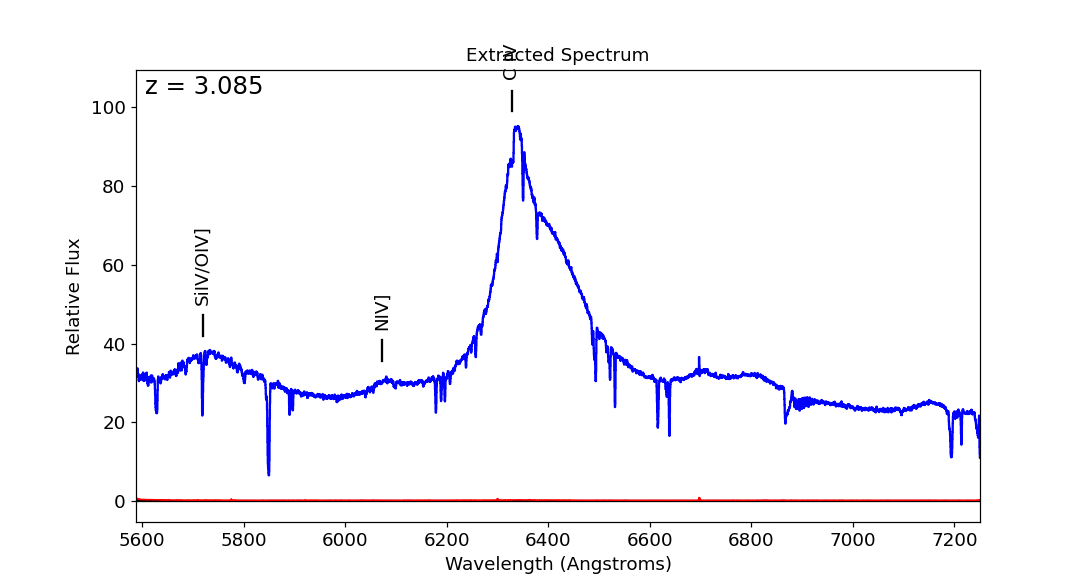


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Si IV/O IV    1400.00       5719.00
N IV]         1486.50       6072.35
C IV          1549.10       6328.07



In [223]:
qs_p.smooth(3)
qs_p.mark_lines('strongem', z=3.085, usesmooth=True)

In [3]:
s = spec1d.Spec1d('J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector_new_wav.fits', informat='fits')


Reading spectrum from J0659_LRIS_spectra/spec1d_J0659_lris_coadd2d_deflector_new_wav.fits
Expected file format: fits
 Spectrum Start:  5587.92
 Spectrum End:     7250.49
 Dispersion (1st pixel):   0.41
 Dispersion (average):      0.41



In [4]:
s['var']

0.802892627356107
0.46975932929179315
0.9366112542945109
0.8950574745898908
1.2101647814515895
1.0165660823778195
1.1132162500784129
0.707399665743169
0.6296036430001056
0.626097183920994
0.498629380163934
